# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    max_el = -float('inf')
    i = 0
    for i in range(arr.shape[0]-1):
        if (arr[i] == 0):
            max_el = max(max_el, arr[i+1])
    return max_el if max_el!=-float('inf') else None

In [3]:
print(max_element(np.array([11, 20, 13])))
print(max_element(np.array([21,0,-1,3])))
print(max_element(np.array([-3,0,0,450])))

None
-1
450


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [4]:
def nearest_value(X, v):
    nearest_value = float('inf')
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if abs(v - X[i][j]) < abs(nearest_value - X[i][j]):
                nearest_value = X[i][j]
    return nearest_value

In [5]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [6]:
def scale(X):
    m, n = X.shape
    mean = np.mean(X, 0)
    std = np.std(X, 0, ddof = 1)
    return (X - np.resize(mean, (m,n))) / std if 0 not in std else "Zero Division"

In [7]:
scale(np.array([[4, 11, 5],
                [1, 7, 9],
                [2, 8, 4]]))

array([[ 1.09108945,  1.12089708, -0.37796447],
       [-0.87287156, -0.80064077,  1.13389342],
       [-0.21821789, -0.32025631, -0.75592895]])

 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [8]:
def get_stats(X):
    trace = np.trace(X)
    det = np.linalg.det(X)
    min_ = X.min()
    max_ = X.max()
    fn = np.linalg.norm(X, 'fro')
    eig = np.linalg.eigvals(X)
    inv = np.linalg.inv(X)
    return det, trace, min_, max_, fn,eig,inv

In [9]:
get_stats(np.random.normal(10, 1, (3, 3)))

(18.643548605545142,
 26.54653362269444,
 8.572918836145433,
 10.226760350000234,
 28.40992003294156,
 array([28.36742643, -0.49608439, -1.32480842]),
 array([[-1.20278758,  0.26045634,  0.93861103],
        [ 0.39416578, -0.4926332 ,  0.14846609],
        [ 0.84272775,  0.25671014, -1.0399397 ]]))

Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [10]:
avg_arr = []
for exp_num in range(100):
    A = np.random.normal(0,1,size = (10,10))
    B = np.random.normal(0,1,size = (10,10))
    C = np.matmul(A, B)
    max_C = C.max()
    avg_arr.append(max_C)
avg = np.mean(avg_arr)
qn = np.quantile(avg_arr, 0.95)
print("Max element :", avg)
print("95 quantile :", qn)

Max element : 8.332361564524126
95 quantile : 11.981672582103714


In [11]:
import matplotlib.pyplot as plt

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [12]:
import numpy as np
import pandas as pd
%matplotlib inline

In [13]:
df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [14]:
df['CancellationCode'].value_counts()
# Самая частая причина отмены рейса - carrier. Перевозчик сам отменил рейс.

A    563
B    549
C    299
Name: CancellationCode, dtype: int64

 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [15]:

print("Average distance - ", df['Distance'].mean())
print("Minimum distance - ", df['Distance'].min())
print("Maximum distance - ", df['Distance'].max())

Average distance -  724.5082571428571
Minimum distance -  31
Maximum distance -  4962


 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [16]:
df[df["Distance"] == 31]
# Рейсы с расстоянием 31 - это Alaska Airlines. Номера рейсов - 64 и 65. 
# При этом два из них были отменены по погодным условиям. Из пункта WRG->PSG и PSG->WRG.
# 31 miles - это расстояние от аэропорта PSG до WRG.
# Дни - 30 и 26 декабря, 18 и 9 августа, 28 февраля и 11 марта.

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1116,2008,12,30,2,1123.0,1007,1148.0,1033,AS,65,...,6.0,6.0,0,NaN,0,0.0,75.0,0.0,0.0,0.0
6958,2008,12,26,5,NaN,1007,NaN,1033,AS,65,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
17349,2008,8,18,1,NaN,1737,NaN,1801,AS,64,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
27534,2008,3,11,2,1611.0,1537,1630.0,1605,AS,64,...,4.0,5.0,0,NaN,0,0.0,25.0,0.0,0.0,0.0
46082,2008,8,9,6,1103.0,1036,1139.0,1100,AS,65,...,4.0,24.0,0,NaN,0,0.0,0.0,12.0,0.0,27.0
48112,2008,2,28,4,1535.0,1537,1603.0,1605,AS,64,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [17]:
df[((df["FlightNum"] == 64) | (df["FlightNum"] == 65))]['Origin'].value_counts()

ATL    10
KTN     9
WRG     8
LAS     8
JNU     7
PSG     5
TPA     5
FLL     4
JFK     4
EWR     3
ANC     3
SNA     3
SEA     2
SFO     2
JAN     1
HOU     1
BUF     1
BWI     1
SJC     1
Name: Origin, dtype: int64

In [18]:
# Hartsfield–Jackson Atlanta International Airport - Атланта, США.

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [19]:
df['Origin'].value_counts()

ATL    4134
ORD    3550
DFW    2793
DEN    2383
LAX    2082
       ... 
ADK       1
BLI       1
RHI       1
AKN       1
PLN       1
Name: Origin, Length: 297, dtype: int64

In [20]:
# Hartsfield–Jackson Atlanta International Airport - Атланта, США.

Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [21]:
mean_AirTime = df.groupby(df['Origin'])['AirTime'].mean()
mean_AirTime.reset_index().sort_values('AirTime', ascending=False)

#SJU - Luis Munoz Marin International, Puerto Rico

,Origin,AirTime
262,SJU,205.200000
38,BQN,193.954545
226,PSE,191.875000
272,STT,185.029412
16,ANC,165.415094
...,...,...
227,PSG,20.250000
212,OXR,19.666667
292,WRG,18.000000
120,GST,13.000000


Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [22]:
subDf = df[df['DepDelay']>0].groupby(df['Origin'])["Origin"].count()[lambda x: x > 1000]
for airport in subDf.index:
    val_cnts = subDf[airport]
    den = df[(df['Origin'] == airport)]['Origin'].value_counts()[airport]
    print(airport, 'ratio :', val_cnts/den)

ATL ratio : 0.42065795839380743
DEN ratio : 0.44607637431808644
DFW ratio : 0.45936269244539923
ORD ratio : 0.46450704225352113


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [23]:
# Your code here

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [24]:
df[df['DepDelay'].isna()]
# ДА, имеются пропущенные значения целевой переменной.
# Причина в том, что рейсы были отменены до вылета.
# Можно исключить признак Cancelled и CancellationCode, Year

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [25]:
df.drop(columns = ['Year','TailNum','Cancelled','CancellationCode','CarrierDelay','NASDelay','WeatherDelay','SecurityDelay','LateAircraftDelay'], inplace = True)

df = df[df['DepDelay'] != 0]
df = df[df['DepDelay'].notna()]

df = df.reset_index()
for col in ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]:
    name_hour = col + "_Hour"
    name_min = col + "_Min"
    df[name_min] = df[col] % 100
    df[name_hour] = (df[col] - df[name_min])/100
    df = df.drop(columns = [col])

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [26]:
df.corrwith(df['DepDelay'])

index               -0.001723
Month               -0.029528
DayofMonth           0.008574
DayOfWeek            0.008530
FlightNum            0.021166
ActualElapsedTime    0.041946
CRSElapsedTime       0.034302
AirTime              0.025237
ArrDelay             0.933526
DepDelay             1.000000
Distance             0.024252
TaxiIn               0.020640
TaxiOut              0.101294
Diverted             0.027166
DepTime_Min         -0.017055
DepTime_Hour         0.203125
CRSDepTime_Min       0.022437
CRSDepTime_Hour      0.140084
ArrTime_Min          0.006171
ArrTime_Hour         0.070181
CRSArrTime_Min       0.008609
CRSArrTime_Hour      0.135561
dtype: float64

In [27]:
df.drop(columns = ['ArrDelay'], inplace = True)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

In [28]:
df = df.drop(columns = ['index'])
df.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,...,TaxiOut,Diverted,DepTime_Min,DepTime_Hour,CRSDepTime_Min,CRSDepTime_Hour,ArrTime_Min,ArrTime_Hour,CRSArrTime_Min,CRSArrTime_Hour
0,6,18,3,WN,242,57.0,65.0,46.0,16.0,MDW,...,8.0,0,11.0,21.0,55,20.0,8.0,23.0,0,23.0
1,6,4,3,XE,2380,124.0,138.0,108.0,16.0,IAH,...,12.0,0,26.0,14.0,10,14.0,30.0,17.0,28,17.0
2,8,3,7,WN,1769,138.0,155.0,125.0,-2.0,MDW,...,9.0,0,43.0,11.0,45,11.0,1.0,15.0,20,15.0
3,1,23,3,OO,3802,102.0,111.0,79.0,-3.0,SLC,...,19.0,0,41.0,11.0,44,11.0,23.0,13.0,35,13.0
4,5,4,7,WN,399,148.0,160.0,136.0,-5.0,LAS,...,8.0,0,15.0,8.0,20,8.0,43.0,12.0,0,13.0


In [29]:
df.isna().sum()

Month                  0
DayofMonth             0
DayOfWeek              0
UniqueCarrier          0
FlightNum              0
ActualElapsedTime    164
CRSElapsedTime         5
AirTime              164
DepDelay               0
Origin                 0
Dest                   0
Distance               0
TaxiIn               140
TaxiOut                7
Diverted               0
DepTime_Min            0
DepTime_Hour           0
CRSDepTime_Min         0
CRSDepTime_Hour        0
ArrTime_Min          140
ArrTime_Hour         140
CRSArrTime_Min         0
CRSArrTime_Hour        0
dtype: int64

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [30]:
#X['DepTime_Hour'].hist(bins=20)

In [31]:
#X['TaxiIn'].hist(bins=20)

In [32]:
#X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
categorical = ['UniqueCarrier','Origin','Dest','Month', 'DayofMonth','DayOfWeek','FlightNum']
binary = ['Diverted']
integer_vals = ['Distance','TaxiIn','TaxiOut','ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','ArrTime_Hour','ArrTime_Min']
def transform_data(data):
    for c in data.columns:
        if c in categorical:
            data[c] = data[c].fillna('nan')
            dummies = pd.get_dummies(data[c]).rename(columns=lambda x: str(c) + "_" + str(x))
            data = pd.concat([data, dummies], axis=1)
            data = data.drop([c], axis=1)
        elif c in integer_vals:
            data[c] = data[c].fillna(0)
            sc = StandardScaler()
            data[c] = sc.fit_transform(data[c].values.reshape(-1,1))
    return data

In [35]:
df = transform_data(df)
df.shape

(63404, 7562)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [36]:
drop_cols = ['UniqueCarrier_9E','Origin_ABE','Dest_ABE','Month_1','DayofMonth_3','DayOfWeek_3','FlightNum_65']
df.drop(columns = drop_cols, inplace = True)

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
y = df['DepDelay']
X = df.drop(columns = ['DepDelay'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(44382, 7554) (44382,)
(19022, 7554) (19022,)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [40]:
linReg = LinearRegression(n_jobs = 4)
X_trains, y_trains = X_train[:1000], y_train[:1000]
linReg.fit(X_trains, y_trains)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [41]:
y_pred = linReg.predict(X_trains).reshape(-1,1)
print("R^2 train :", linReg.score(X_trains, np.array(y_trains).reshape(-1,1)))
print("MSE train :", mse(y_pred, y_trains))

y_pred = linReg.predict(X_test).reshape(-1,1)
print("R^2 train :", linReg.score(X_test, np.array(y_test).reshape(-1,1)))
print("MSE train :", mse(y_pred, y_test))

R^2 train : 1.0
MSE train : 4.803998200256297e-25
R^2 train : -1.6125567389558348
MSE train : 2.6405917922810063


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [42]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [43]:
LassoReg = Lasso(fit_intercept=False)
lasso_params = {'alpha':np.linspace(0.001,3,50)}
clf = GridSearchCV(LassoReg, lasso_params, cv = 5, verbose = True, n_jobs = -1)
best_modelL = clf.fit(X_trains, y_trains)
RidgeReg = Ridge(fit_intercept=False)
ridge_params = {'alpha':np.linspace(0.001,3,50)}
clf = GridSearchCV(RidgeReg, ridge_params, cv = 5, verbose = True,  n_jobs = -1)
best_modelR = clf.fit(X_trains, y_trains)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   14.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   15.2s finished


In [44]:
print(best_modelR.best_score_)
print(best_modelL.best_score_)

-0.1324836026834711
0.007608026854476679


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [45]:
X['ones'] = np.ones(X.shape[0])

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [46]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.matmul(X,w.T)

In [47]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    y_pred = make_pred(X, w)
    return np.mean(np.square(((y - y_pred) / y)), axis=0)

In [48]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    z = make_pred(X, w)
    n = y.shape[0] 
    dz = (2/n)*((z - y)/ y**2)    
    dw = np.matmul(dz.T, X)
    return dw

def mspe(y, y_pred):
    return np.mean(np.square(((y - y_pred) / y)), axis=0)

In [49]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(y_pred, y, w):
    return np.mean(np.square(((y - y_pred) / y)), axis=0) + np.square(np.linalg.norm(w))

In [50]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    z = make_pred(X, w)
    n = y.shape[0] 
    dz = (2/n)*((z - y)/ y**2)    
    dw = np.matmul(dz.T, X) + 2 * np.linalg.norm(w)
    return dw

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [51]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg = True) -> tuple:
    w = w0.copy()
    diff = 1.0
    costs = []
    i = 0
    for i in range(1, max_iter):
        z = make_pred(X, w)
        
        if is_reg:
            err = get_reg_func(z, y, w)
            #print(norm(w))
            dw = get_reg_grad(w, X, y)
        else:
            err = mspe(y, z)
            dw = get_grad(w, X, y)
         
        costs.append(err)
        step = step_size * dw
        if norm(step) < eps or err > costs[0]:
            print("Epsilon rule stop")
            break
        w = w - step_size * dw
        if i %1000 == 0:
            print(f"i = {i}/{max_iter} {i/max_iter * 100} %) ")
            print("MSPE :", mspe(y, z))
            print("-----")
    plt.plot(costs, label = 'MSPE')
    s = f"is_reg = {is_reg}"
    plt.title(s)
    plt.legend()
    plt.show()
    return w, costs

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [52]:
from numpy.linalg import norm

Epsilon rule stop


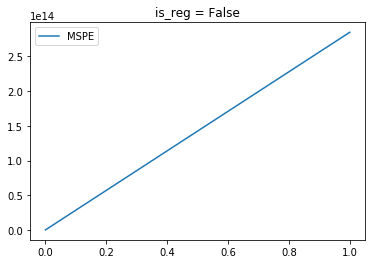

Epsilon rule stop


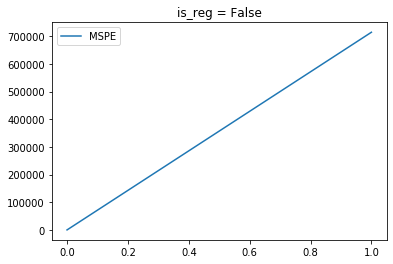

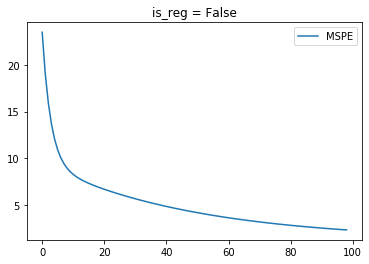

In [53]:
reg = False
for sz in [1, 0.0001, 0.0000001]:
    w0 = np.random.randn(1, X_trains.shape[1]) * 0.01
    weights, costs = grad_descent(np.array(X_trains), np.array(y_trains).reshape(-1,1), w0, step_size = sz,\
                              eps = 0.000001, max_iter = 100, is_reg = reg)


Epsilon rule stop


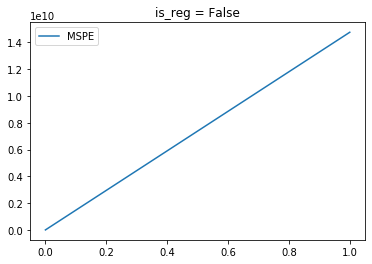

Epsilon rule stop


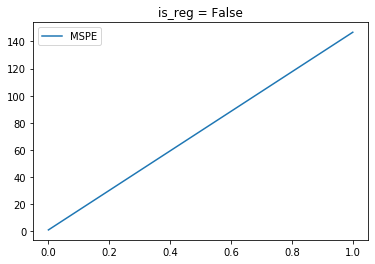

Epsilon rule stop


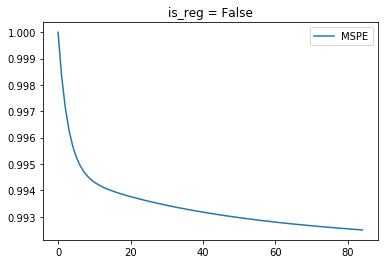

In [54]:
reg = False
for sz in [1, 0.0001, 0.0000001]:
    w0 = np.zeros(shape = (1, X_trains.shape[1]))
    weights, costs = grad_descent(np.array(X_trains), np.array(y_trains).reshape(-1,1), w0, step_size = sz,\
                              eps = 0.000001, max_iter = 100, is_reg = reg)

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [55]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [56]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here
    

SyntaxError: unexpected EOF while parsing (<ipython-input-56-57b54ec66d8f>, line 3)

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.